# Census analytics

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [241]:
census_df = pd.read_csv('census-income.csv')

In [242]:
census_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [243]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing data

In [244]:
census_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [253]:
census_df['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [255]:
census_df[(census_df['workclass'] == 'Private') & (census_df['native-country'] != 'United-States') & (census_df['native-country'] != '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [270]:
census_df[(census_df['annual_income'] == '<=50K') | (census_df['hours-per-week'] > 40)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [269]:
census_df[(census_df['hours-per-week'] > 40)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


### annual income vs age

In [246]:
sel_ai = census_df['annual_income']== '<=50K'

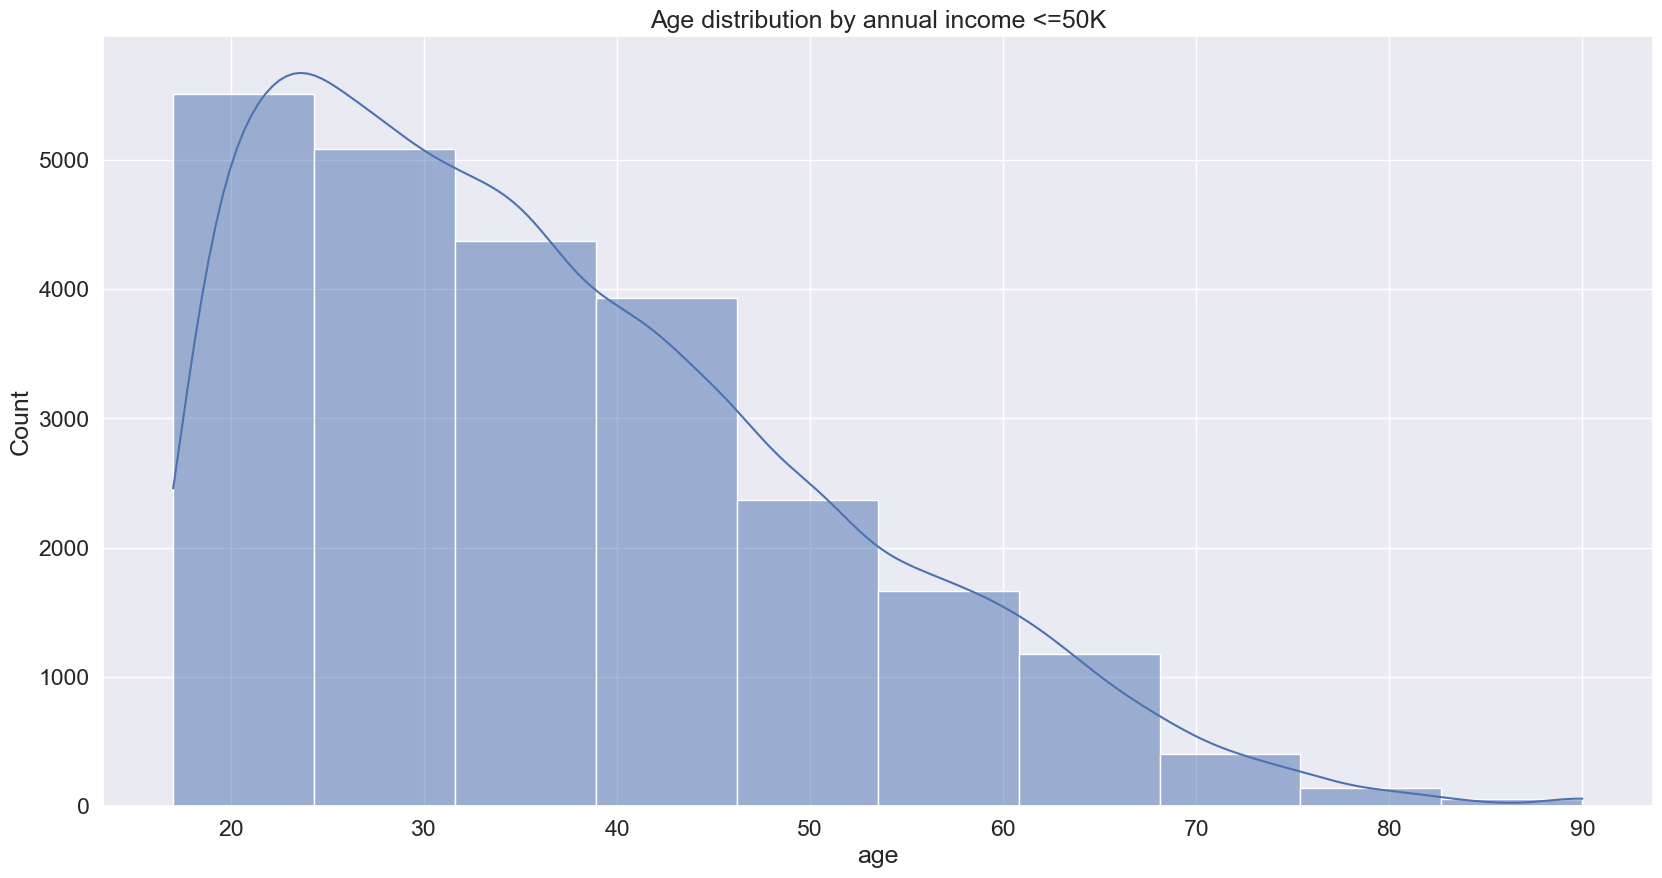

In [247]:
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['age'], bins=10, kde=True)
plt.title('Age distribution by annual income <=50K')
plt.show()

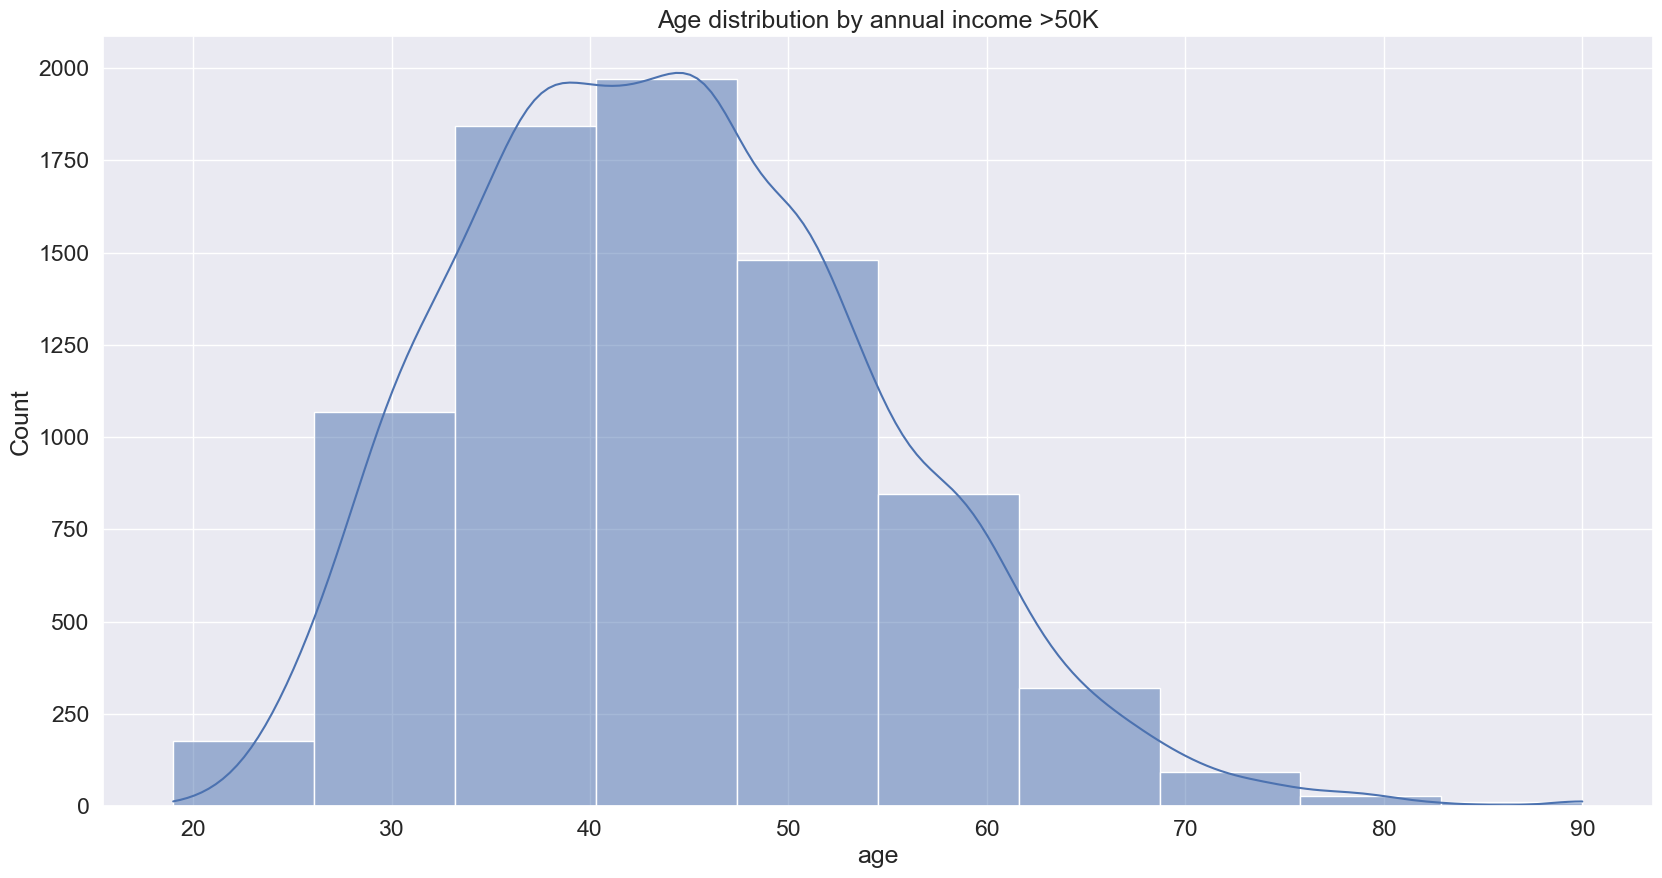

In [248]:
sel_ai = census_df['annual_income']== '>50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['age'], bins=10, kde=True)
plt.title('Age distribution by annual income >50K')
plt.show()

### annual income vs occupation

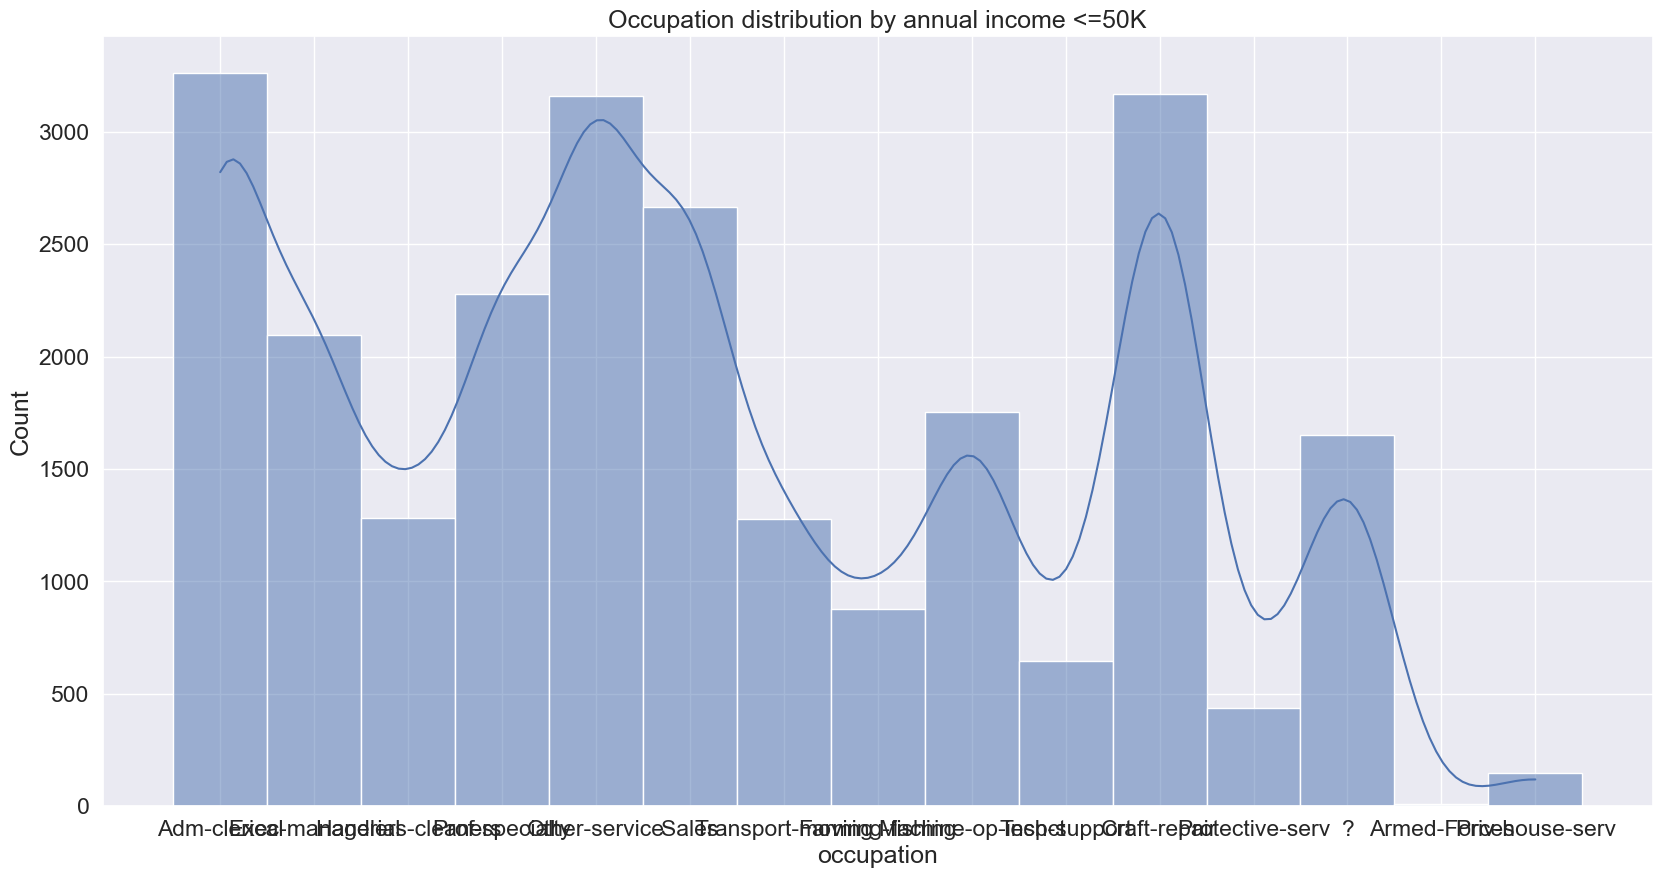

In [249]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['occupation'], bins=20, kde=True)
plt.title('Occupation distribution by annual income <=50K')
plt.show()

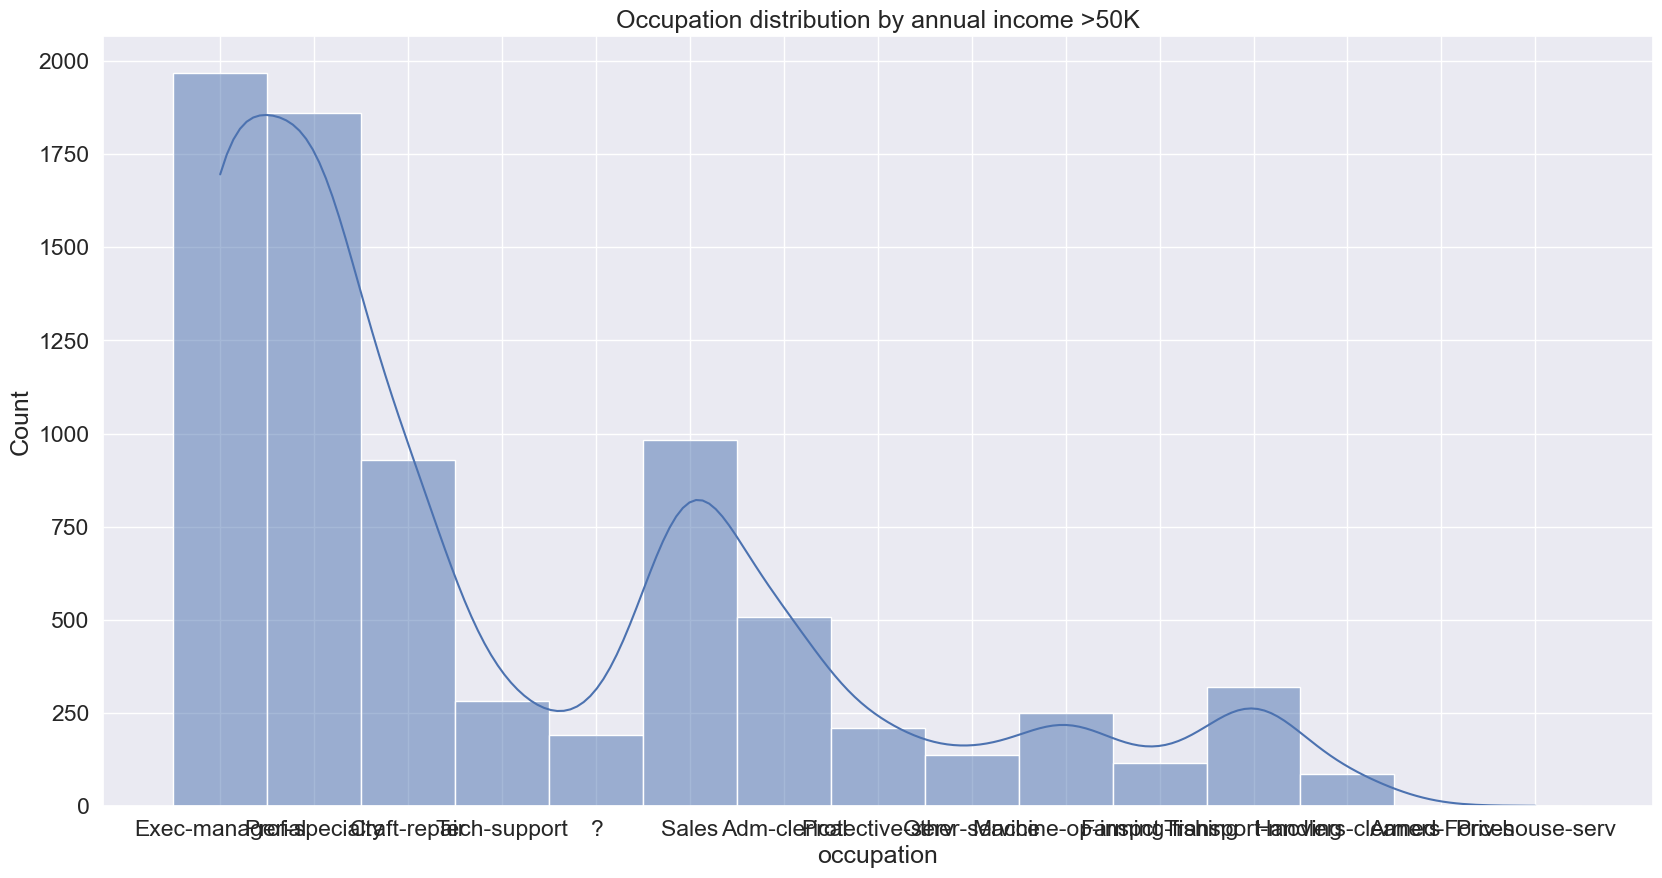

In [250]:
sel_ai = census_df['annual_income']== '>50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['occupation'], bins=20, kde=True)
plt.title('Occupation distribution by annual income >50K')
plt.show()

In [251]:
census_df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [252]:
len(census_df['occupation'].unique())

15

In [259]:
census_df[(census_df['occupation'] == 'Tech-support') & (census_df['annual_income'] == '>50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K
357,40,Private,96129,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
469,30,Private,118551,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31510,42,Private,111483,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
31653,25,Private,189656,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,United-States,>50K
31807,51,Self-emp-not-inc,170086,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
32076,59,Federal-gov,293971,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [237]:
ts = census_df[(census_df['occupation'] == 'Tech-support')]
ts

,age,education,education-num,occupation,race,sex,hours-per-week,native-country,annual_income
24,59,HS-grad,9,Tech-support,White,Female,40,United-States,<=50K
25,56,Bachelors,13,Tech-support,White,Male,40,United-States,>50K
42,24,Bachelors,13,Tech-support,White,Male,50,United-States,<=50K
55,43,Some-college,10,Tech-support,White,Male,40,United-States,>50K
64,29,Some-college,10,Tech-support,White,Male,58,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32396,56,HS-grad,9,Tech-support,Black,Female,40,United-States,<=50K
32457,33,Masters,14,Tech-support,Asian-Pac-Islander,Male,50,United-States,>50K
32546,37,Assoc-acdm,12,Tech-support,White,Female,40,United-States,<=50K
32553,32,Masters,14,Tech-support,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [238]:
ts[ts['annual_income'] == '>50K']

,age,education,education-num,occupation,race,sex,hours-per-week,native-country,annual_income
25,56,Bachelors,13,Tech-support,White,Male,40,United-States,>50K
55,43,Some-college,10,Tech-support,White,Male,40,United-States,>50K
248,40,Assoc-acdm,12,Tech-support,White,Male,60,United-States,>50K
357,40,Assoc-voc,11,Tech-support,White,Male,40,United-States,>50K
469,30,Bachelors,13,Tech-support,White,Female,16,United-States,>50K
...,...,...,...,...,...,...,...,...,...
31510,42,Bachelors,13,Tech-support,White,Male,50,United-States,>50K
31653,25,Bachelors,13,Tech-support,White,Male,60,United-States,>50K
31807,51,Bachelors,13,Tech-support,White,Male,45,United-States,>50K
32076,59,Some-college,10,Tech-support,White,Male,40,United-States,>50K


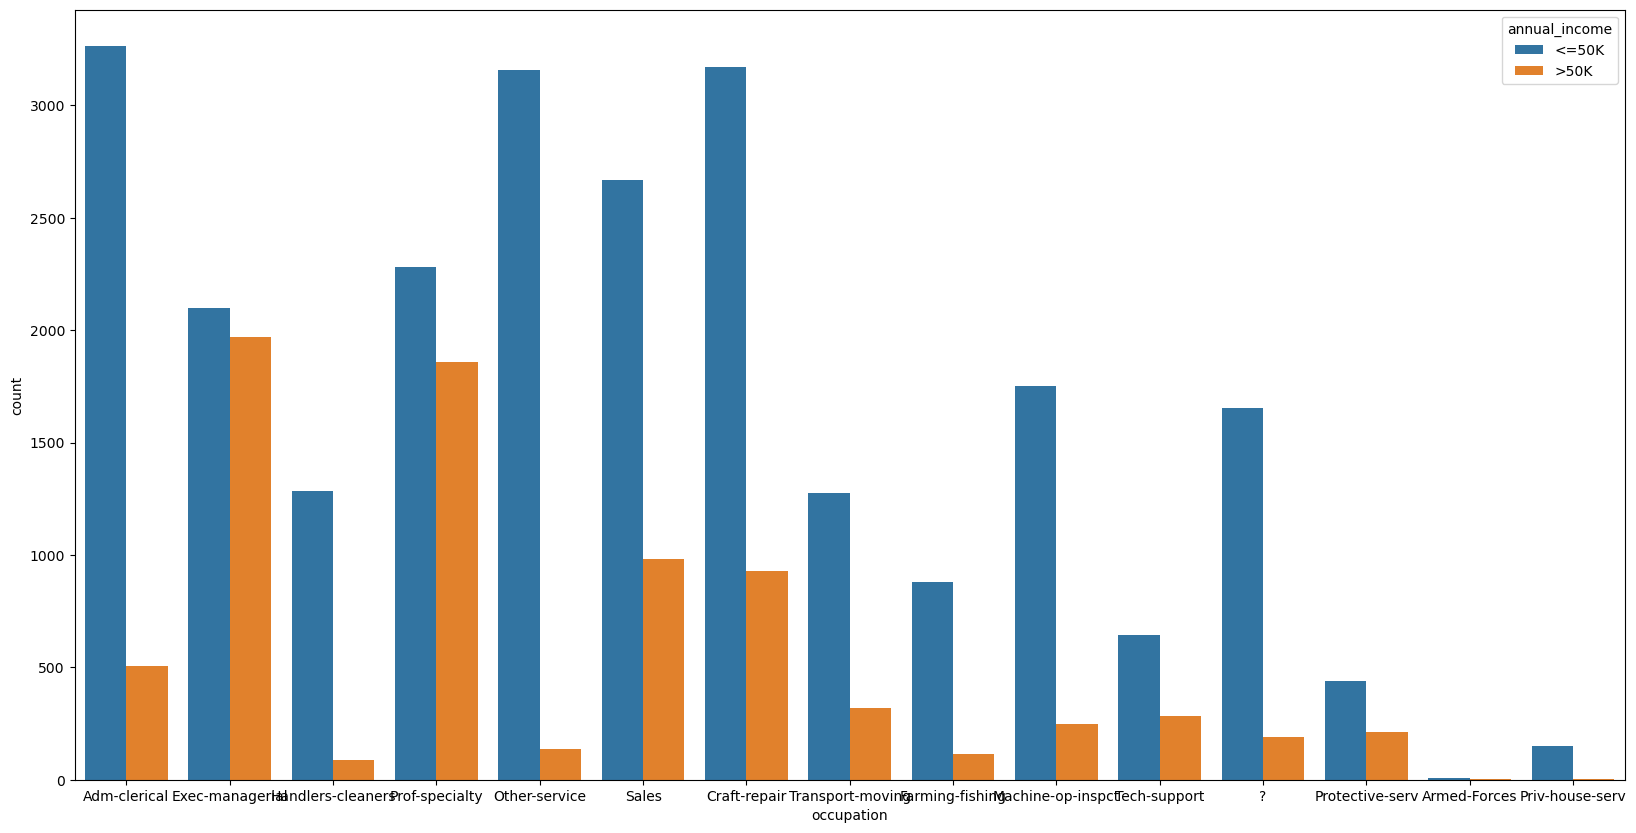

In [15]:
plt.subplots(figsize=(20,10))
sns.countplot(x='occupation', hue='annual_income', data=census_df)
plt.show()

In [16]:
census_df[census_df['occupation'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


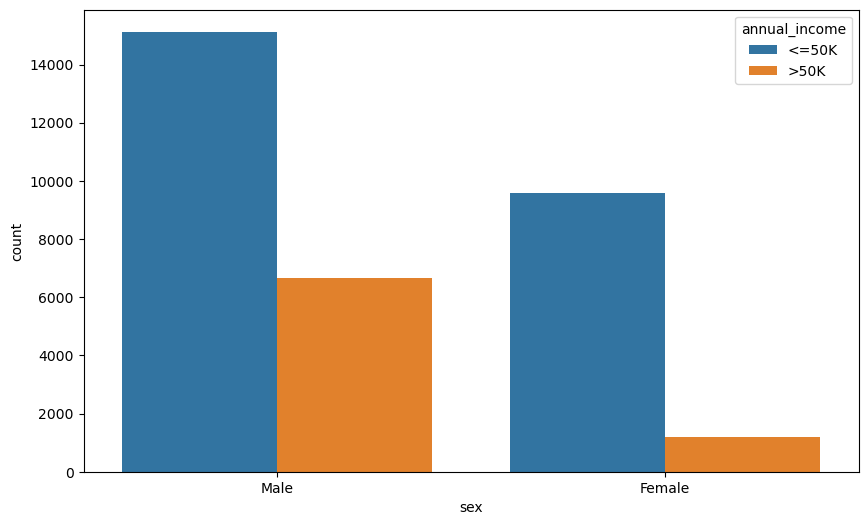

In [17]:
plt.subplots(figsize=(10,6))
sns.countplot(x='sex', hue='annual_income', data=census_df)
plt.show()

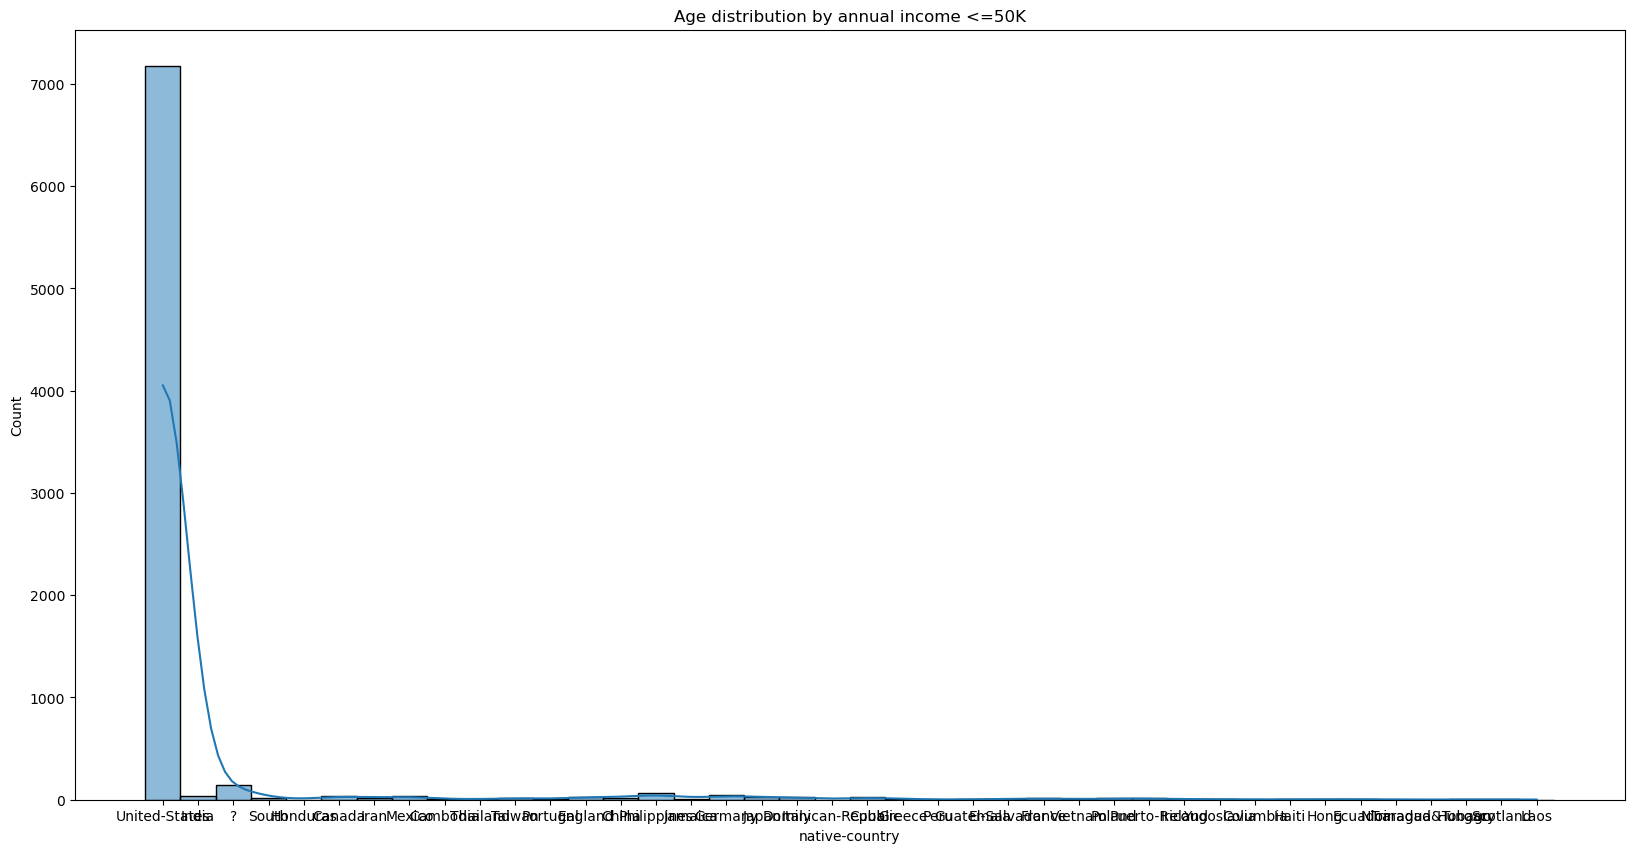

In [18]:
sel_ai = census_df['annual_income']== '>50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['native-country'], bins=10, kde=True)
plt.title('Age distribution by annual income <=50K')
plt.show()

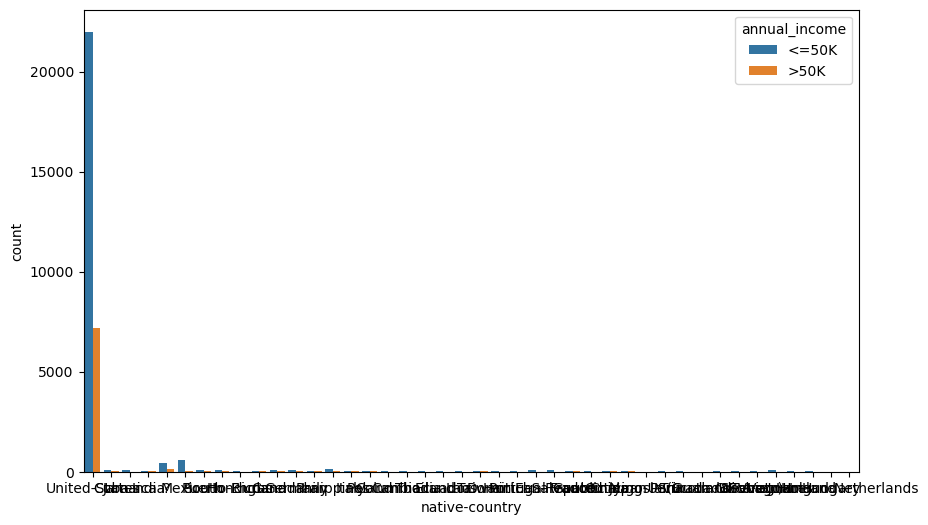

In [19]:
plt.subplots(figsize=(10,6))
sns.countplot(x='native-country', hue='annual_income', data=census_df)
plt.show()

In [20]:
census_df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

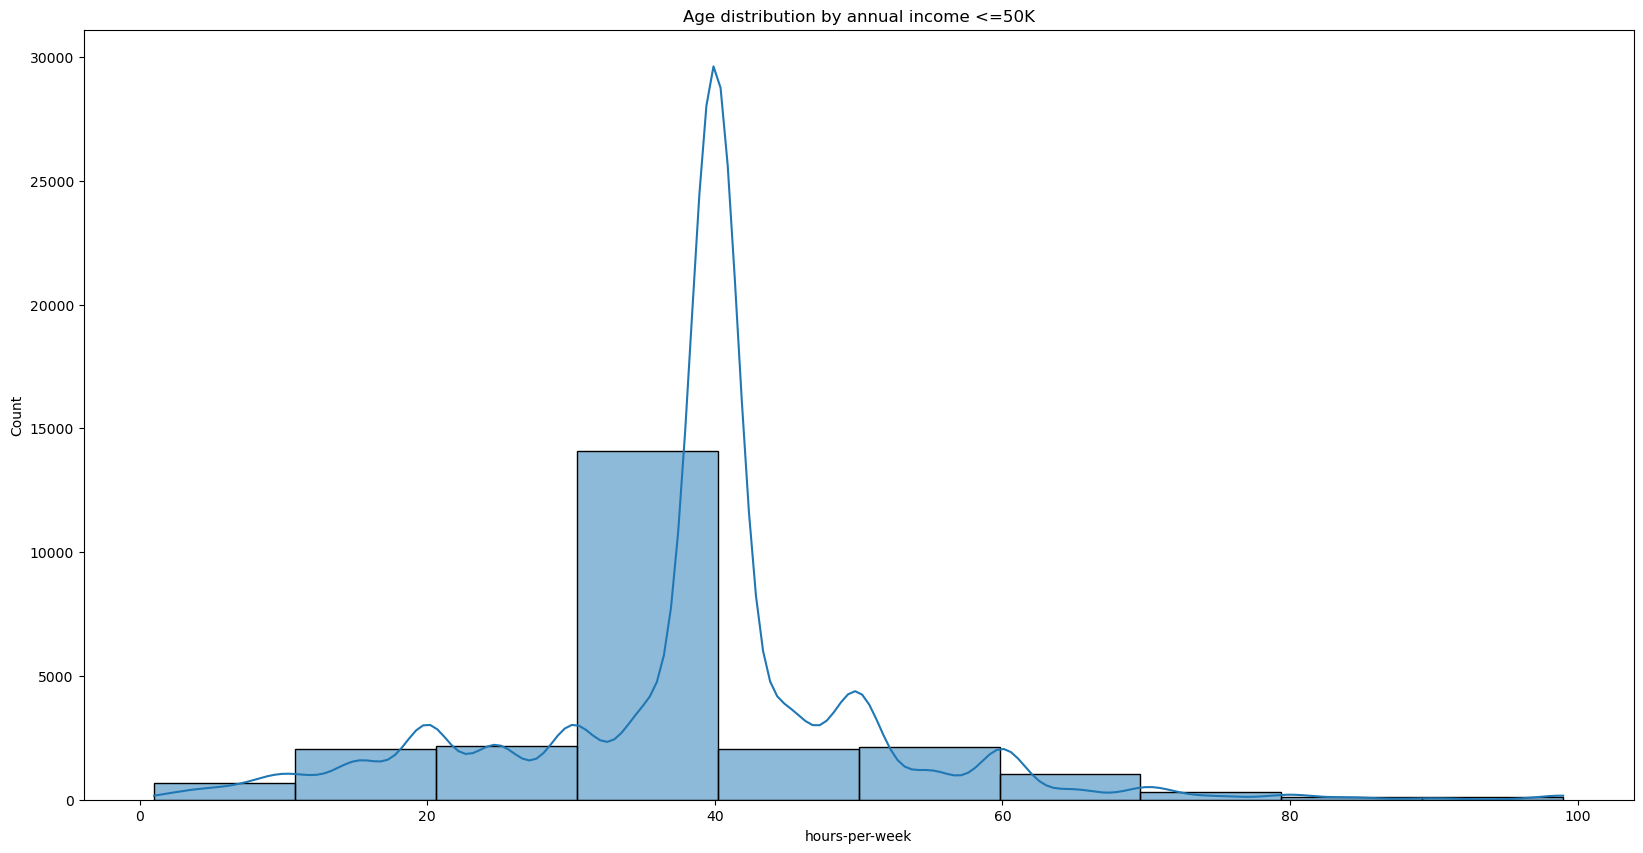

In [21]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['hours-per-week'], bins=10, kde=True)
plt.title('Age distribution by annual income <=50K')
plt.show()

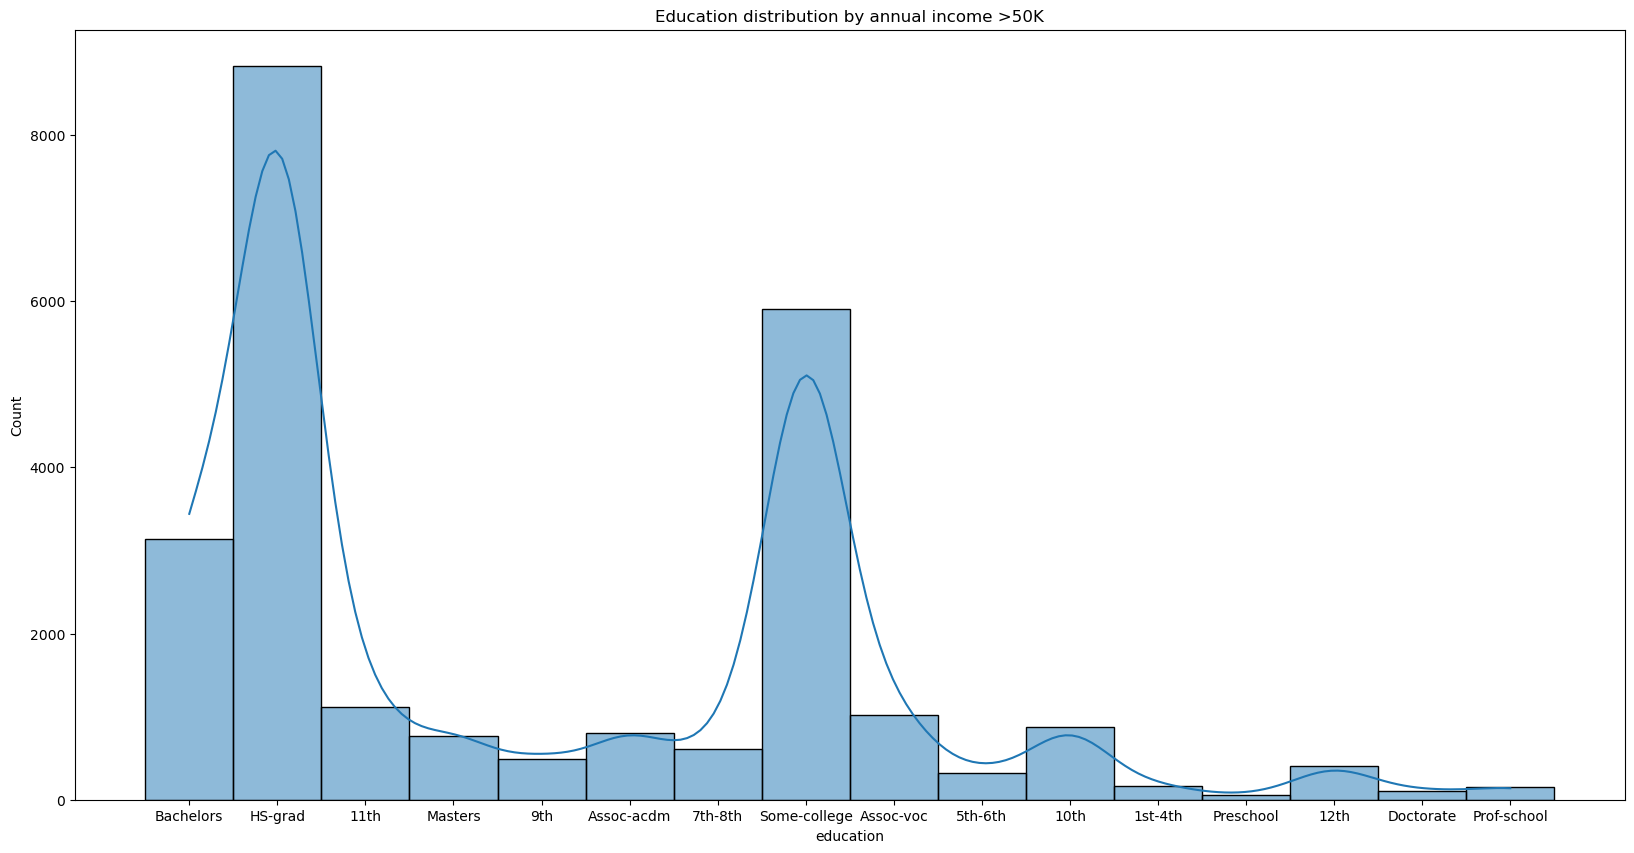

In [37]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['education'], bins=20, kde=True)
plt.title('Education distribution by annual income >50K')
plt.show()

KeyError: 'workclass'

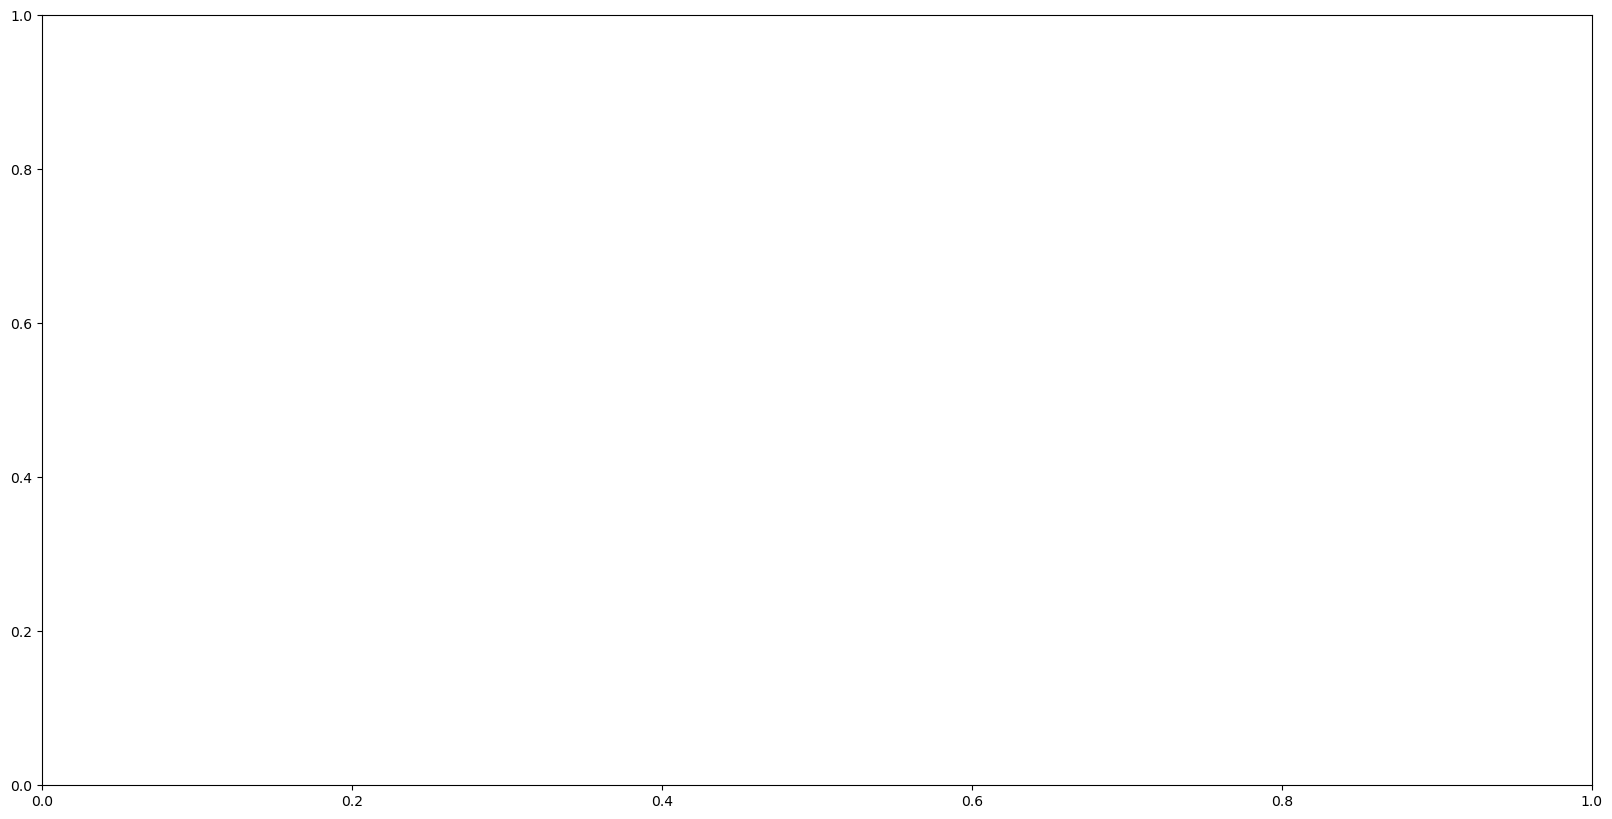

In [47]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['workclass'], bins=20, kde=True)
plt.title('Education distribution by annual income >50K')
plt.show()

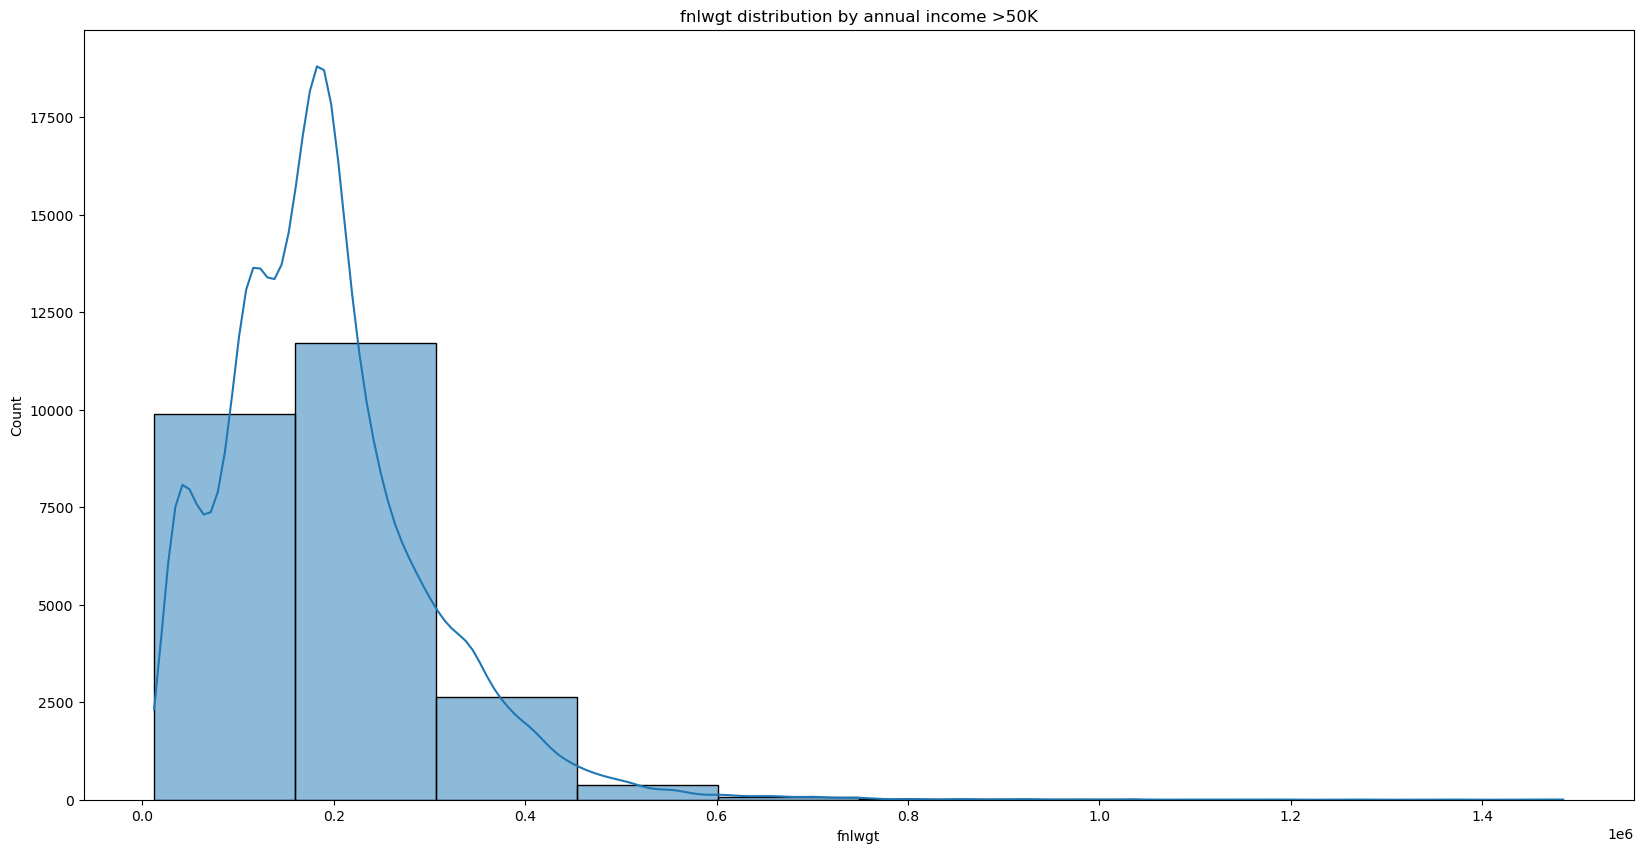

In [48]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['fnlwgt'], bins=10, kde=True)
plt.title('fnlwgt distribution by annual income >50K')
plt.show()

In [25]:
census_df[census_df['capital-gain'] > 0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


In [26]:
census_df[census_df['capital-loss'] > 0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32441,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,>50K
32443,18,Private,41381,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,1602,20,United-States,<=50K
32445,61,Private,190682,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,1669,50,United-States,<=50K
32458,36,Private,237943,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K


#### Drop unwanted columns

In [75]:
census_df.drop(['fnlwgt','capital-gain', 'capital-loss', 'marital-status', 'relationship', 'workclass'], axis=1, inplace=True)

In [76]:
census_df.columns

Index(['age', 'education', 'education-num', 'occupation', 'race', 'sex',
       'hours-per-week', 'native-country', 'annual_income'],
      dtype='object')

In [77]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   occupation      32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   hours-per-week  32561 non-null  int64 
 7   native-country  32561 non-null  object
 8   annual_income   32561 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [78]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [79]:
census_df_final = census_df

In [80]:
#del census_df_final

In [81]:
for col in ['education', 'occupation', 'race', 'sex', 'native-country']:
    census_df_final = create_encoding(census_df_final, col)

In [82]:
census_df.sample(5)

,age,education,education-num,occupation,race,sex,hours-per-week,native-country,annual_income
17793,31,HS-grad,9,Handlers-cleaners,White,Male,40,United-States,<=50K
2853,28,HS-grad,9,Sales,White,Female,40,United-States,<=50K
10998,65,HS-grad,9,Farming-fishing,White,Male,24,United-States,<=50K
28966,39,Some-college,10,Adm-clerical,White,Male,40,United-States,>50K
10643,32,Assoc-voc,11,Adm-clerical,White,Female,40,United-States,<=50K


In [103]:
census_df_final.drop( ['education', 'occupation', 'race', 'sex', 'native-country'], axis=1, inplace=True)

In [104]:
census_df_final.head(10)

,age,education-num,hours-per-week,annual_income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,5,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,14,50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,13,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
census_df_final['annual_income']= label_encoder.fit_transform(census_df_final['annual_income']) 
  
census_df_final['annual_income'].unique() 

array([0, 1], dtype=int64)

In [106]:
census_df_final.head(10)

,age,education-num,hours-per-week,annual_income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,5,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,14,50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,13,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Create train and validation sets

In [109]:
census_df_final.columns

Index(['age', 'education-num', 'hours-per-week', 'annual_income',
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Oth

In [110]:
input_vars = ['age', 'education-num', 'hours-per-week', 
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Female', 'sex_Male', 'native-country_?', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia']

In [311]:
X = census_df_final[input_vars]

KeyError: "['Cdur', 'Camt', 'InRate', 'NumCred', 'Ndepend', 'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education', 'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous', 'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining', 'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years', 'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed', 'MSG_divorced or separated male', 'MSG_divorced or separated or married female', 'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one', 'Oparties_yes|co-applicant', 'Oparties_yes|guarantor', 'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year', 'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown', 'Prop_life insurance/building society', 'Prop_real estate', 'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free', 'Htype_own', 'Htype_pays rent', 'JobType_employed either in management|self or in high position', 'JobType_employee with official position', 'JobType_non resident either unemployed or  unskilled ', 'JobType_resident unskilled', 'foreign_no', 'foreign_yes', 'creditScore_bad', 'creditScore_good'] not in index"

In [112]:
X.sample(2)

,age,education-num,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
12292,17,7,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12779,50,9,35,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [306]:
y = census_df_final['annual_income']

In [308]:
census_df_final

,age,education-num,hours-per-week,annual_income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [114]:
y.sample(2)

16721    1
17679    0
Name: annual_income, dtype: int64

In [310]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.20, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 32561]

In [288]:
train_X.shape, val_X.shape

((700, 50), (300, 50))

In [289]:
len(X)

1000

In [290]:
26048/32561*100

79.99754307300144

### Training the model

In [291]:
log_reg_model_1 = LogisticRegression()

In [292]:
log_reg_model_1

LogisticRegression()

In [293]:
log_reg_model_1.fit(train_X, train_y)

LogisticRegression()

### Validating the model

In [294]:
pred_values = log_reg_model_1.predict(val_X)

In [295]:
pred_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

### Calcuate the performance metrics of the model

In [296]:
acc = accuracy_score(val_y, pred_values)

In [301]:
print('Accuracy of the model is: ', acc*100)

Accuracy of the model is:  61.66666666666667


In [305]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(val_y, pred_values, average="macro"))
print(precision_score(val_y, pred_values, average="macro"))
print(recall_score(val_y, pred_values, average="macro"))

0.1907216494845361
0.15416666666666667
0.25


C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plot the confusion matrix using heatmap

#### To calculate the confusion matrix

In [298]:
cm = confusion_matrix(val_y, pred_values)  # predicted vs actual

In [299]:
cm

array([[  0,  15,   0,   0],
       [  0, 185,   0,   0],
       [  0,  89,   0,   0],
       [  0,  11,   0,   0]], dtype=int64)

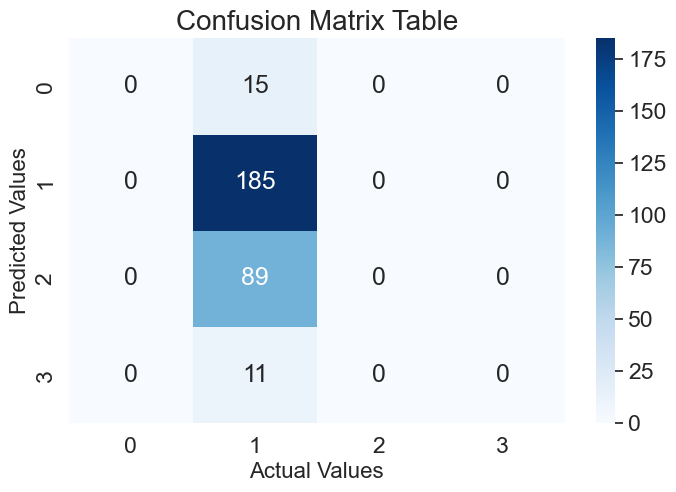

In [300]:
plt.subplots(figsize=(8, 5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.show()

In [286]:
(4602+652)/(4602+652+934+325)*100

80.66943037002918

# Credit Worthiness Data Analytics

In [155]:
credit_df = pd.read_csv('CreditWorthiness.csv')

In [156]:
credit_df.head(10)

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,yes|guarantor,...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,employed either in management|self or in high ...,1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good
5,no checking account,27,all settled till now,renovation,51780,no savings account,more than 7 years,4,single male,no one,...,life insurance/building society,48,none,own,4,employee with official position,2,yes,no,good
6,no checking account,12,all settled till now,electronics,21590,Rs. < 1000,less than 1 year,2,divorced or separated or married female,no one,...,Other cars etc.,29,bank,own,1,employee with official position,1,no,no,good
7,0 <= Rs. < 2000,12,all settled till now,second hand vehicle,9950,Rs. >= 10000,1 to 4 years,4,married or widowed male,no one,...,real estate,22,none,own,1,employee with official position,1,no,no,good
8,no checking account,36,all settled till now,education,18070,Rs. < 1000,1 to 4 years,4,single male,no one,...,Unknown,37,stores,free,1,employee with official position,1,yes,no,bad
9,no checking account,36,all settled till now,electronics,23820,no savings account,1 to 4 years,4,divorced or separated or married female,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,no,no,good


In [200]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   int32 
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

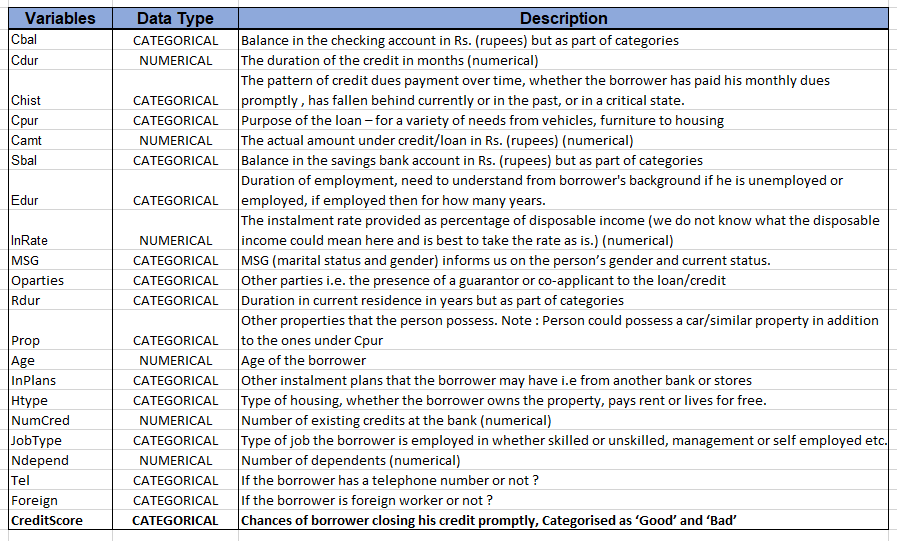

In [158]:
credit_df['Cbal'].unique()

array(['0 <= Rs. < 2000', 'no checking account', ' Rs. < 0', 'Rs. >=2000'],
      dtype=object)

In [159]:
credit_df['Chist'].unique()

array(['all settled till now', 'dues not paid earlier',
       'none taken/all settled', 'all settled'], dtype=object)

In [160]:
credit_df['Cpur'].unique()

array(['Business', 'electronics', 'renovation', 'second hand vehicle',
       'education', 'new vehicle', 'miscellaneous', 'furniture',
       'retaining', 'domestic needs'], dtype=object)

In [161]:
credit_df['Sbal'].unique()

array(['Rs. < 1000', 'no savings account', 'Rs. >= 10000',
       '5000 <= Rs. < 10000', '1000 <= Rs. < 5000'], dtype=object)

In [162]:
credit_df['Edur'].unique()

array(['1 to 4 years', 'more than 7 years', 'less than 1 year',
       '4 to 7 years', 'not employed'], dtype=object)

In [163]:
credit_df['MSG'].unique()

array(['married or widowed male', 'single male',
       'divorced or separated or married female',
       'divorced or separated male'], dtype=object)

In [164]:
credit_df['Oparties'].unique()

array(['no one', 'yes|guarantor', 'yes|co-applicant'], dtype=object)

In [165]:
credit_df['Prop'].unique()

array(['real estate', 'Unknown', 'Other cars etc.',
       'life insurance/building society'], dtype=object)

In [166]:
credit_df['inPlans'].unique()

array(['bank', 'none', 'stores'], dtype=object)

In [167]:
credit_df['Htype'].unique()

array(['own', 'free', 'pays rent'], dtype=object)

In [168]:
credit_df['JobType'].unique()

array(['employee with official position',
       'employed either in management|self or in high position',
       'resident unskilled',
       'non resident either unemployed or  unskilled '], dtype=object)

In [169]:
credit_df['telephone'].unique()

array(['yes', 'no'], dtype=object)

In [170]:
credit_df['foreign'].unique()

array(['no', 'yes'], dtype=object)

In [171]:
credit_df['creditScore'].unique()

array(['good', 'bad'], dtype=object)

In [173]:
credit_df.isna().sum()

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

In [202]:
credit_df.drop(['Cbal', 'Sbal', 'telephone'], axis=1, inplace=True)

In [203]:
credit_df_final = credit_df

In [204]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
credit_df_final['Chist']= label_encoder.fit_transform(credit_df_final['Chist']) 
  
credit_df_final['Chist'].unique() 

array([1, 2, 3, 0], dtype=int64)

In [205]:
credit_df.sample(2)

,Cdur,Chist,Cpur,Camt,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,foreign,creditScore
780,36,1,furniture,51670,4 to 7 years,4,single male,no one,1 to 2 years,life insurance/building society,29,none,own,1,employee with official position,1,no,bad
872,9,2,second hand vehicle,12120,1 to 4 years,3,single male,no one,less than a year,real estate,30,none,own,2,employee with official position,1,no,good


In [206]:
credit_df_final.sample(2)

,Cdur,Chist,Cpur,Camt,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,foreign,creditScore
207,24,1,electronics,15210,less than 1 year,4,divorced or separated or married female,no one,2 to 3 years,Other cars etc.,38,stores,own,1,employee with official position,1,no,good
436,36,1,furniture,90220,less than 1 year,4,single male,yes|co-applicant,less than a year,Unknown,29,none,pays rent,1,employed either in management|self or in high ...,1,no,bad


In [207]:
credit_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cdur         1000 non-null   int64 
 1   Chist        1000 non-null   int64 
 2   Cpur         1000 non-null   object
 3   Camt         1000 non-null   int64 
 4   Edur         1000 non-null   object
 5   InRate       1000 non-null   int64 
 6   MSG          1000 non-null   object
 7   Oparties     1000 non-null   object
 8   Rdur         1000 non-null   object
 9   Prop         1000 non-null   object
 10  age          1000 non-null   int64 
 11  inPlans      1000 non-null   object
 12  Htype        1000 non-null   object
 13  NumCred      1000 non-null   int64 
 14  JobType      1000 non-null   object
 15  Ndepend      1000 non-null   int64 
 16  foreign      1000 non-null   object
 17  creditScore  1000 non-null   object
dtypes: int64(7), object(11)
memory usage: 140.8+ KB


In [208]:
credit_df_final.columns

Index(['Cdur', 'Chist', 'Cpur', 'Camt', 'Edur', 'InRate', 'MSG', 'Oparties',
       'Rdur', 'Prop', 'age', 'inPlans', 'Htype', 'NumCred', 'JobType',
       'Ndepend', 'foreign', 'creditScore'],
      dtype='object')

### Encoding Categorical Variables

In [213]:
for col in ['Cpur', 'Edur', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'JobType', 'foreign', 'creditScore']:
    credit_df_final = create_encoding(credit_df_final, col)

In [214]:
credit_df_final.head(10)

,Cdur,Chist,Cpur,Camt,Edur,InRate,MSG,Oparties,Rdur,Prop,...,Htype_own,Htype_pays rent,JobType_employed either in management|self or in high position,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,foreign_no,foreign_yes,creditScore_bad,creditScore_good
0,9,1,Business,13790,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,...,1,0,0,1,0,0,1,0,0,1
1,15,2,electronics,15250,more than 7 years,4,single male,yes|guarantor,more than 3 years,real estate,...,1,0,0,1,0,0,1,0,0,1
2,36,3,Business,19410,more than 7 years,4,single male,no one,more than 3 years,Unknown,...,0,0,1,0,0,0,1,0,1,0
3,48,3,Business,144090,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,...,1,0,0,1,0,0,1,0,1,0
4,24,1,electronics,31690,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,...,1,0,0,1,0,0,1,0,0,1
5,27,1,renovation,51780,more than 7 years,4,single male,no one,more than 3 years,life insurance/building society,...,1,0,0,1,0,0,1,0,0,1
6,12,1,electronics,21590,less than 1 year,2,divorced or separated or married female,no one,1 to 2 years,Other cars etc.,...,1,0,0,1,0,0,1,0,0,1
7,12,1,second hand vehicle,9950,1 to 4 years,4,married or widowed male,no one,less than a year,real estate,...,1,0,0,1,0,0,1,0,0,1
8,36,1,education,18070,1 to 4 years,4,single male,no one,more than 3 years,Unknown,...,0,0,0,1,0,0,1,0,1,0
9,36,1,electronics,23820,1 to 4 years,4,divorced or separated or married female,no one,more than 3 years,Other cars etc.,...,1,0,0,1,0,0,1,0,0,1


In [216]:
credit_df_final.drop(['Cpur', 'Edur', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'JobType', 'foreign', 'creditScore'], axis=1, inplace=True)

In [217]:
credit_df_final.head(10)

,Cdur,Chist,Camt,InRate,age,NumCred,Ndepend,Cpur_Business,Cpur_domestic needs,Cpur_education,...,Htype_own,Htype_pays rent,JobType_employed either in management|self or in high position,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,foreign_no,foreign_yes,creditScore_bad,creditScore_good
0,9,1,13790,2,27,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,15,2,15250,4,50,2,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,36,3,19410,4,61,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,48,3,144090,2,25,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,1,31690,4,26,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
5,27,1,51780,4,48,4,2,0,0,0,...,1,0,0,1,0,0,1,0,0,1
6,12,1,21590,2,29,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7,12,1,9950,4,22,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
8,36,1,18070,4,37,1,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
9,36,1,23820,4,25,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


### Create train and validation sets

In [218]:
credit_df_final.columns

Index(['Cdur', 'Chist', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend',
       'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education',
       'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous',
       'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining',
       'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years',
       'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed',
       'MSG_divorced or separated male',
       'MSG_divorced or separated or married female',
       'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one',
       'Oparties_yes|co-applicant', 'Oparties_yes|guarantor',
       'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year',
       'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown',
       'Prop_life insurance/building society', 'Prop_real estate',
       'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free',
       'Htype_own', 'Htype_pays rent',
       'JobType_empl

In [219]:
print(credit_df_final.columns.tolist())

['Cdur', 'Chist', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend', 'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education', 'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous', 'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining', 'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years', 'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed', 'MSG_divorced or separated male', 'MSG_divorced or separated or married female', 'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one', 'Oparties_yes|co-applicant', 'Oparties_yes|guarantor', 'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year', 'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown', 'Prop_life insurance/building society', 'Prop_real estate', 'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free', 'Htype_own', 'Htype_pays rent', 'JobType_employed either in management|self or in high position', 'JobType_employee with official position', 'JobType_non re

In [220]:
input_vars = ['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend', 'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education', 'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous', 'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining', 'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years', 'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed', 'MSG_divorced or separated male', 'MSG_divorced or separated or married female', 'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one', 'Oparties_yes|co-applicant', 'Oparties_yes|guarantor', 'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year', 'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown', 'Prop_life insurance/building society', 'Prop_real estate', 'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free', 'Htype_own', 'Htype_pays rent', 'JobType_employed either in management|self or in high position', 'JobType_employee with official position', 'JobType_non resident either unemployed or  unskilled ', 'JobType_resident unskilled', 'foreign_no', 'foreign_yes', 'creditScore_bad', 'creditScore_good']

In [221]:
X = credit_df_final[input_vars]
X.sample(2)

,Cdur,Camt,InRate,age,NumCred,Ndepend,Cpur_Business,Cpur_domestic needs,Cpur_education,Cpur_electronics,...,Htype_own,Htype_pays rent,JobType_employed either in management|self or in high position,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,foreign_no,foreign_yes,creditScore_bad,creditScore_good
101,18,10430,4,30,2,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
415,18,31020,1,26,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [222]:
y = credit_df_final['Chist']
y.sample(2)

872    2
129    3
Name: Chist, dtype: int64

In [223]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=45)
train_X.shape, val_X.shape

((800, 50), (200, 50))

In [224]:
len(X)

1000

In [225]:
800/1000*100

80.0

### Training the model

In [226]:
log_reg_model_1 = LogisticRegression() #creating the model object
log_reg_model_1

LogisticRegression()

In [227]:
log_reg_model_1.fit(train_X, train_y)

LogisticRegression()

### Validating the model

In [228]:
pred_values = log_reg_model_1.predict(val_X) #test/validation set
pred_values #predicted values for survival for validation set

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Calculate performance metrics of the model

In [229]:
acc = accuracy_score(val_y, pred_values)
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 62.5
